# Tarefa 7 - Leonardo Gargitter GRR20172145

## 1) Considere o sinal x1 uma senoide de baixa frequência e o sinal x2 uma senoide de alta frequência e o sinal x sendo a soma destes dois:

## $n=0:63$; $x_1=sin(\frac{4\pi n}{64})$; $x_2=sin(\frac{14\pi n}{64})$; $x=x_1 + x_2$; $x_0=\begin{bmatrix}x & zeros(1,64)\end{bmatrix}$;

In [1]:
from numpy import *
from scipy.signal import *
from scipy.fft import *
from matplotlib.pyplot import *

In [10]:
n = arange(64)
x1 = sin(4*pi*n/64)
x2 = sin(14*pi*n/64)
x = x1 + x2
x0 = concatenate((x,zeros(64)))

## 2) Obtenha os coeficientes de um filtro elíptico de quarta ordem com frequência normalizada de corte igual a 0,25 ($\omega=\frac{\pi}{4}$).

In [75]:
wn=1/4
b, a = ellip(4,0.15,40,wn)

## 3) Visualize o espectro do sinal x e a resposta em frequência do filtro calculado, no mesmo eixo.

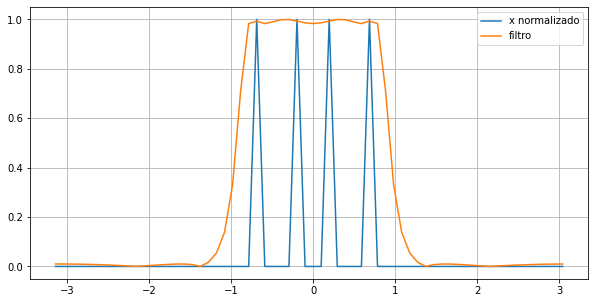

In [76]:
rfreq_x = fftshift(abs(fft(x)))
w = fftshift(fftfreq(len(n))*2*pi)

w_filtro, rfreq_filtro = freqz(b, a, w)

figure(figsize=(10,5))
plot(w, rfreq_x/max(rfreq_x), label='x normalizado')
plot(w_filtro, abs(rfreq_filtro), label='filtro')
legend()
grid()
show()

## 4) filtre o sinal x0 com a função comando filter()

In [77]:
x_filtrado1 = lfilter(b,a,x0)

## 5) filtre o sinal x realizando a convolução com a resposta impulsional do filtro (obtendo sinal com 128 valores)

In [78]:
imp = zeros(128)
imp[0] = 1

resp_impulso = lfilter(b,a, imp)

x_filtrado2 = convolve(x, resp_impulso)
x_filtrado2 = x_filtrado2[0:128]

## 6) filtre o sinal x, fazendo produto no domínio da frequência com a resposta em frequência do filtro (com 128 valores)

In [79]:
ri_fft = fft(resp_impulso)

x0_fft = fft(x0)

x_filtrado3 = ri_fft * x0_fft
x_filtrado3 = ifft(x_filtrado3)

## 7) plote os 3 resultados no mesmo eixo

   ### a) No tempo
   ### b) Em frequência

<function matplotlib.pyplot.show(close=None, block=None)>

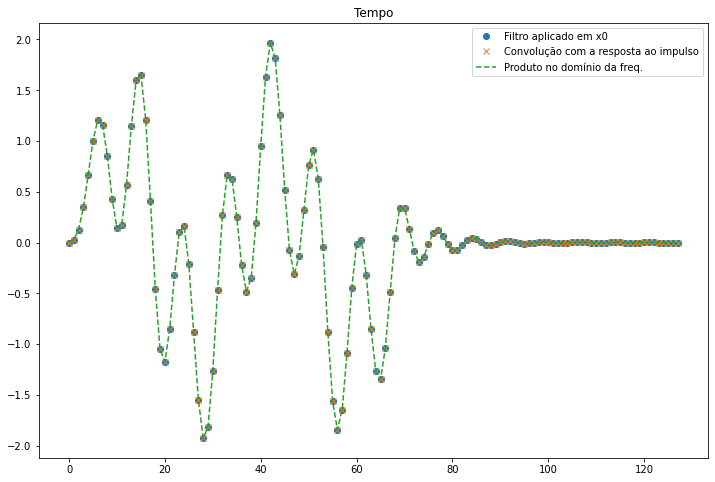

In [80]:
figure(figsize=(12,8))
plot(x_filtrado1,'o', label='Filtro aplicado em x0')
plot(x_filtrado2,'x', label='Convolução com a resposta ao impulso')
plot(x_filtrado3,'--', label='Produto no domínio da freq.')
title('Tempo')
legend()
show

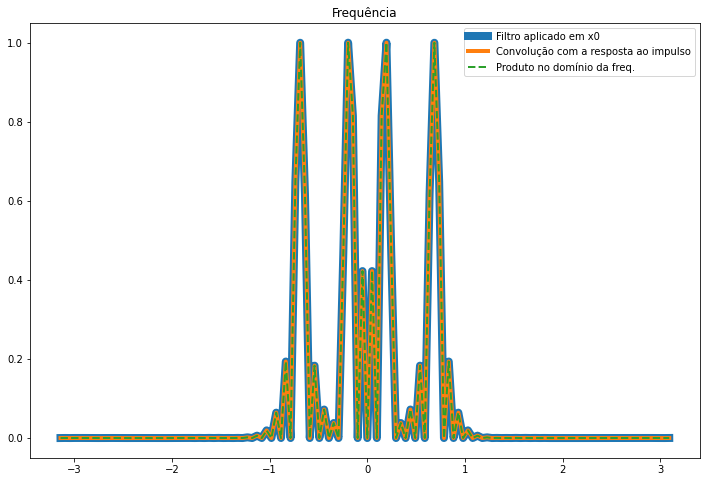

In [81]:
figure(figsize=(12,8))
plot(fftshift(fftfreq(len(x_filtrado1))*2*pi),fftshift(abs(fft(x_filtrado1)))/max(abs(fft(x_filtrado1))),linewidth=8, label='Filtro aplicado em x0')
plot(fftshift(fftfreq(len(x_filtrado2))*2*pi),fftshift(abs(fft(x_filtrado2)))/max(abs(fft(x_filtrado2))),linewidth=4,  label='Convolução com a resposta ao impulso')
plot(fftshift(fftfreq(len(x_filtrado3))*2*pi),fftshift(abs(fft(x_filtrado3)))/max(abs(fft(x_filtrado3))),'--',linewidth=2, label='Produto no domínio da freq.')
title('Frequência')
legend()
show()